In [1]:
# Code used to create Figure 4.1 in Ch. 4 of Number of sites with data (barplot) and Fig. 4.3 of Annual
# consumption (boxplot)
# Created 7Jul23 - for thesis VF submission
# Based on Jupyter notebook: Jua udata(26Aug22)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Data PJua Sarah/Usage data (HB)"

In [3]:
cwd = os.getcwd()
cwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Doctos PhD/PhD milestones/Thesis writing/Chapter writing/PhD thesis VF/PhD thesis images submission/Figures source'

In [4]:
# Change to path where csv file is saved
os.chdir(path) # or put the whole path
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Data PJua Sarah/Usage data (HB)'

In [5]:
# Import csv of data to plot
data = pd.read_csv("Site_info_usage.csv")
data.columns

Index(['Site Name', 'County', 'Institution', 'Annual Consumption Filled (kWh)',
       'Annual Consumption Measured (kWh)'],
      dtype='object')

In [6]:
# Create new df with selected columns
new = data[["Site Name","County","Institution", "Annual Consumption Filled (kWh)"]]
new.head(10)

,Site Name,County,Institution,Annual Consumption Filled (kWh)
0,Tata Primary School,Kwale,School,443.889032
1,Mikameni Primary School,Kwale,School,577.479844
2,Abagarse Primary School,Isiolo,School,202.753024
3,Kombola primary school,Isiolo,School,224.879883
4,Magale Primary School,Kwale,School,347.316604
5,Akadeli Primary School,Isiolo,School,489.704637
6,Kalokoda Primary School,Turkana,School,142.639354
7,Makonjeni Primary School,Kilifi,School,369.438955
8,Todonyang Primary School,Turkana,School,311.966460
9,Kaalem Primary School,Turkana,School,319.903105


In [7]:
# Show stats of data, this new df includes Chilodi Dispensary so n=167
new.describe().round(2)

,Annual Consumption Filled (kWh)
count,167.00
mean,520.10
std,428.39
min,72.97
25%,284.00
50%,407.88
75%,607.89
max,4253.42


In [8]:
# Remove outlier (Chilodi Dispensary, clinic in Kilifi county). 166 sites in total now, clinics (n=18)
new.loc[new["Site Name"] == "Chilodi Dispensary"]  # to get row where Chilodi is

,Site Name,County,Institution,Annual Consumption Filled (kWh)
102,Chilodi Dispensary,Kilifi,Clinic,4253.4214


In [9]:
# Remove outlier (Chilodi Dispensary, clinic in Kilifi county). 166 sites in total now, clinics (n=18)
new.index[new["Site Name"] == "Chilodi Dispensary"] # to get index of row of Chilodi

Int64Index([102], dtype='int64')

In [10]:
# Drop Chilodi Dispensary (outlier)
new_out = new.drop([102])
new_out.describe().round(2) # to see new values without Chilodi (outlier)
                  # now max value is 1832.77 which is Chumvi yere Primary School

,Annual Consumption Filled (kWh)
count,166.00
mean,497.61
std,315.67
min,72.97
25%,283.80
50%,406.23
75%,597.21
max,1832.78


In [11]:
# Create df with count of sites per county and institution type
count=new_out[["County", "Institution"]].value_counts().reset_index(name="count")
count

,County,Institution,count
0,Kwale,School,54
1,Kilifi,School,41
2,Isiolo,School,32
3,Turkana,School,17
4,Kwale,Clinic,6
5,Taita Taveta,Clinic,6
6,Kilifi,Clinic,4
7,Taita Taveta,School,4
8,Isiolo,Clinic,2


In [12]:
count["count"].sum() # return 166 sites so ok!

166

In [18]:
# Set style to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("notebook") # don't use paper for barplot
sns.set_style("ticks") # with axis ticks, no background lines
#sns.set_style("whitegrid") # no axis ticks, with background lines

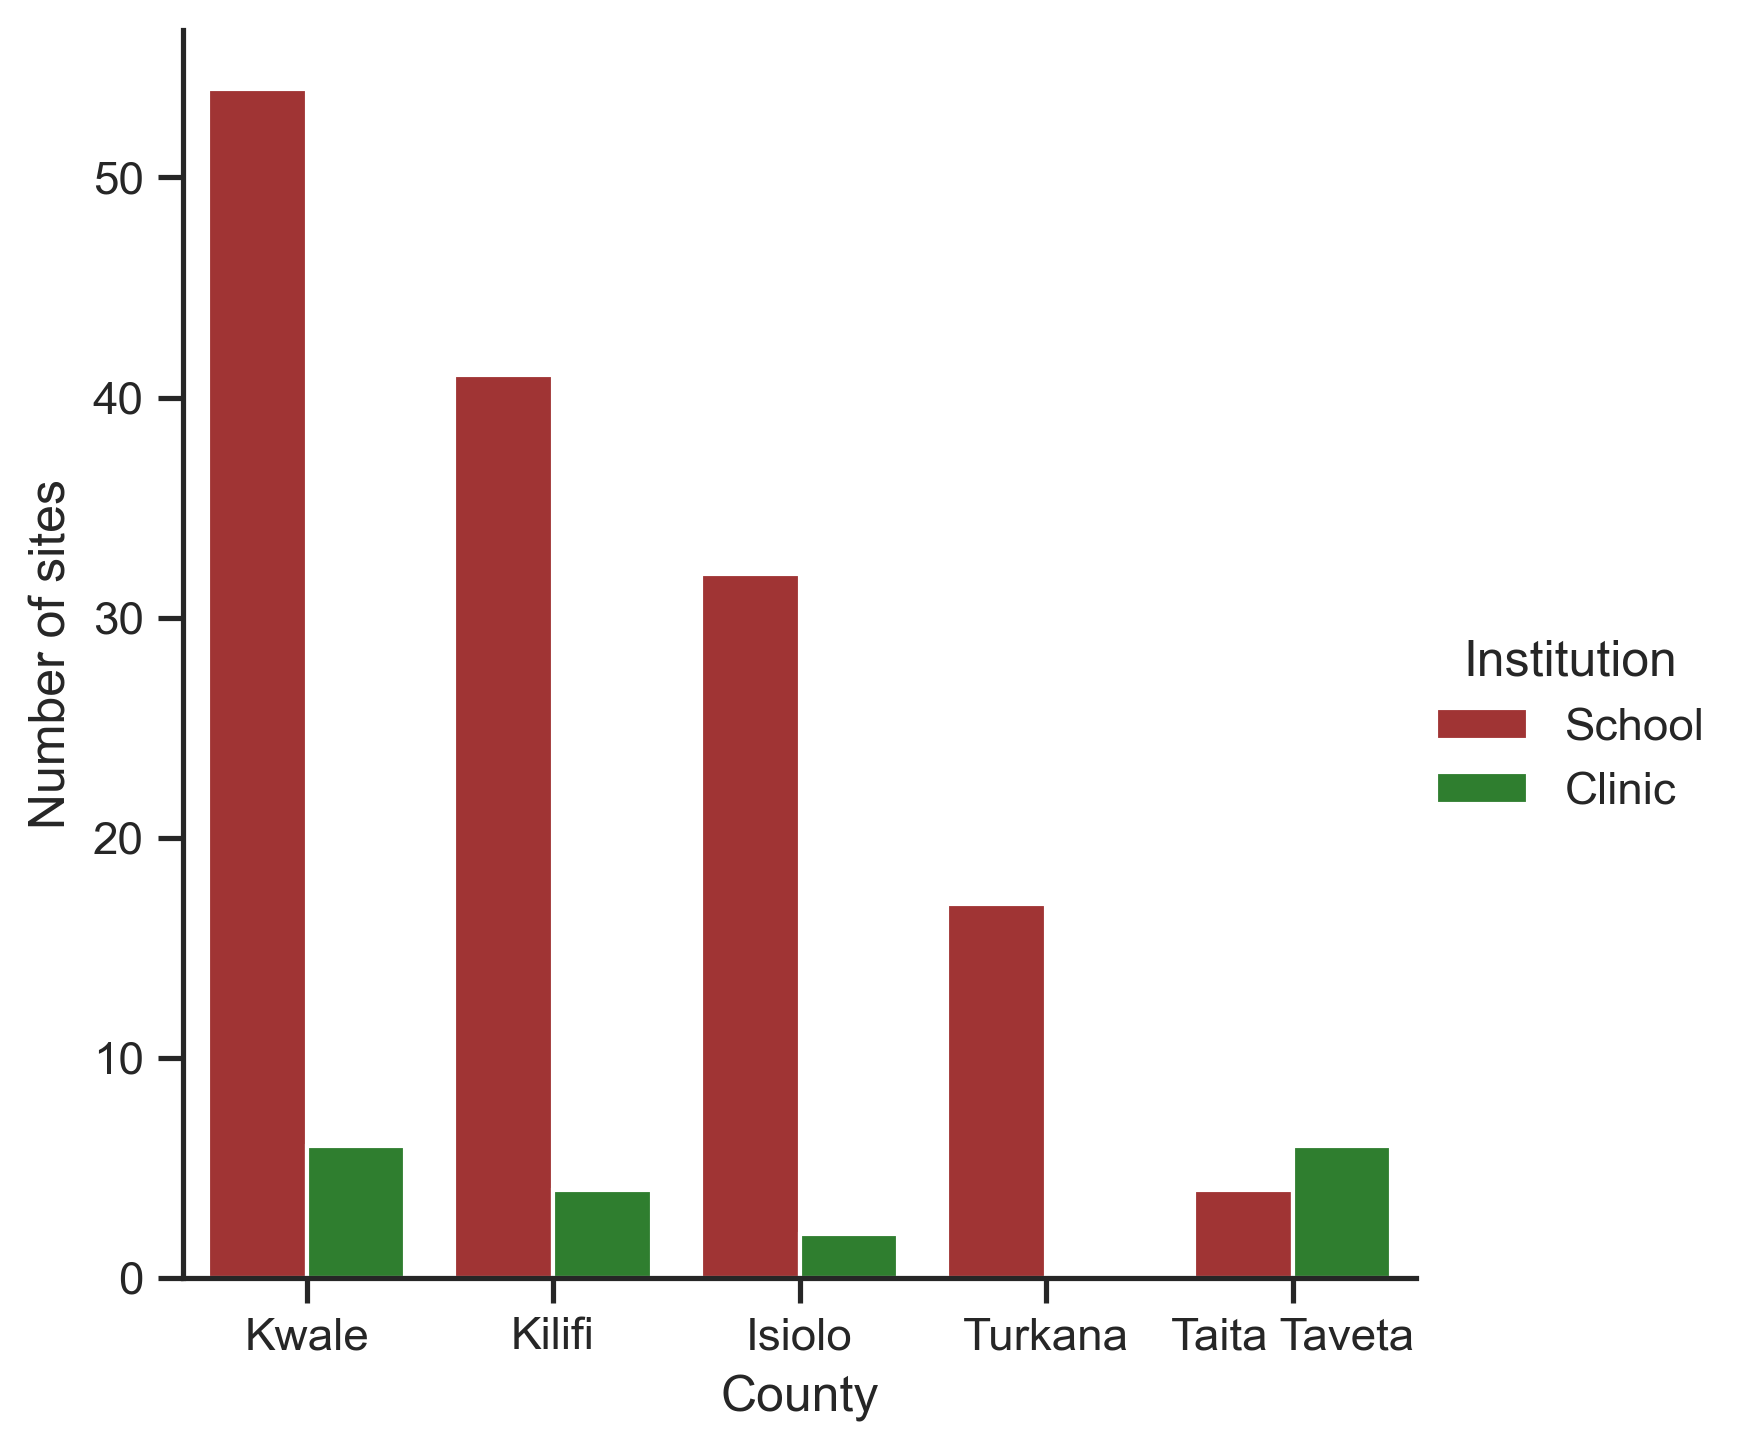

In [19]:
# Barplot for Figure 4.1 (VF in thesis)
palette= ["firebrick", "forestgreen"]
g = sns.catplot(
    data=count, kind="bar",
    x="County", y="count", hue="Institution", palette=palette,
)
g.set(ylabel="Number of sites")
# save the figure
plt.savefig("Fig_4.1.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [21]:
# Set style to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper") #
sns.set_style("ticks") # with axis ticks, no background lines
#sns.set_style("whitegrid") # no axis ticks, with background lines

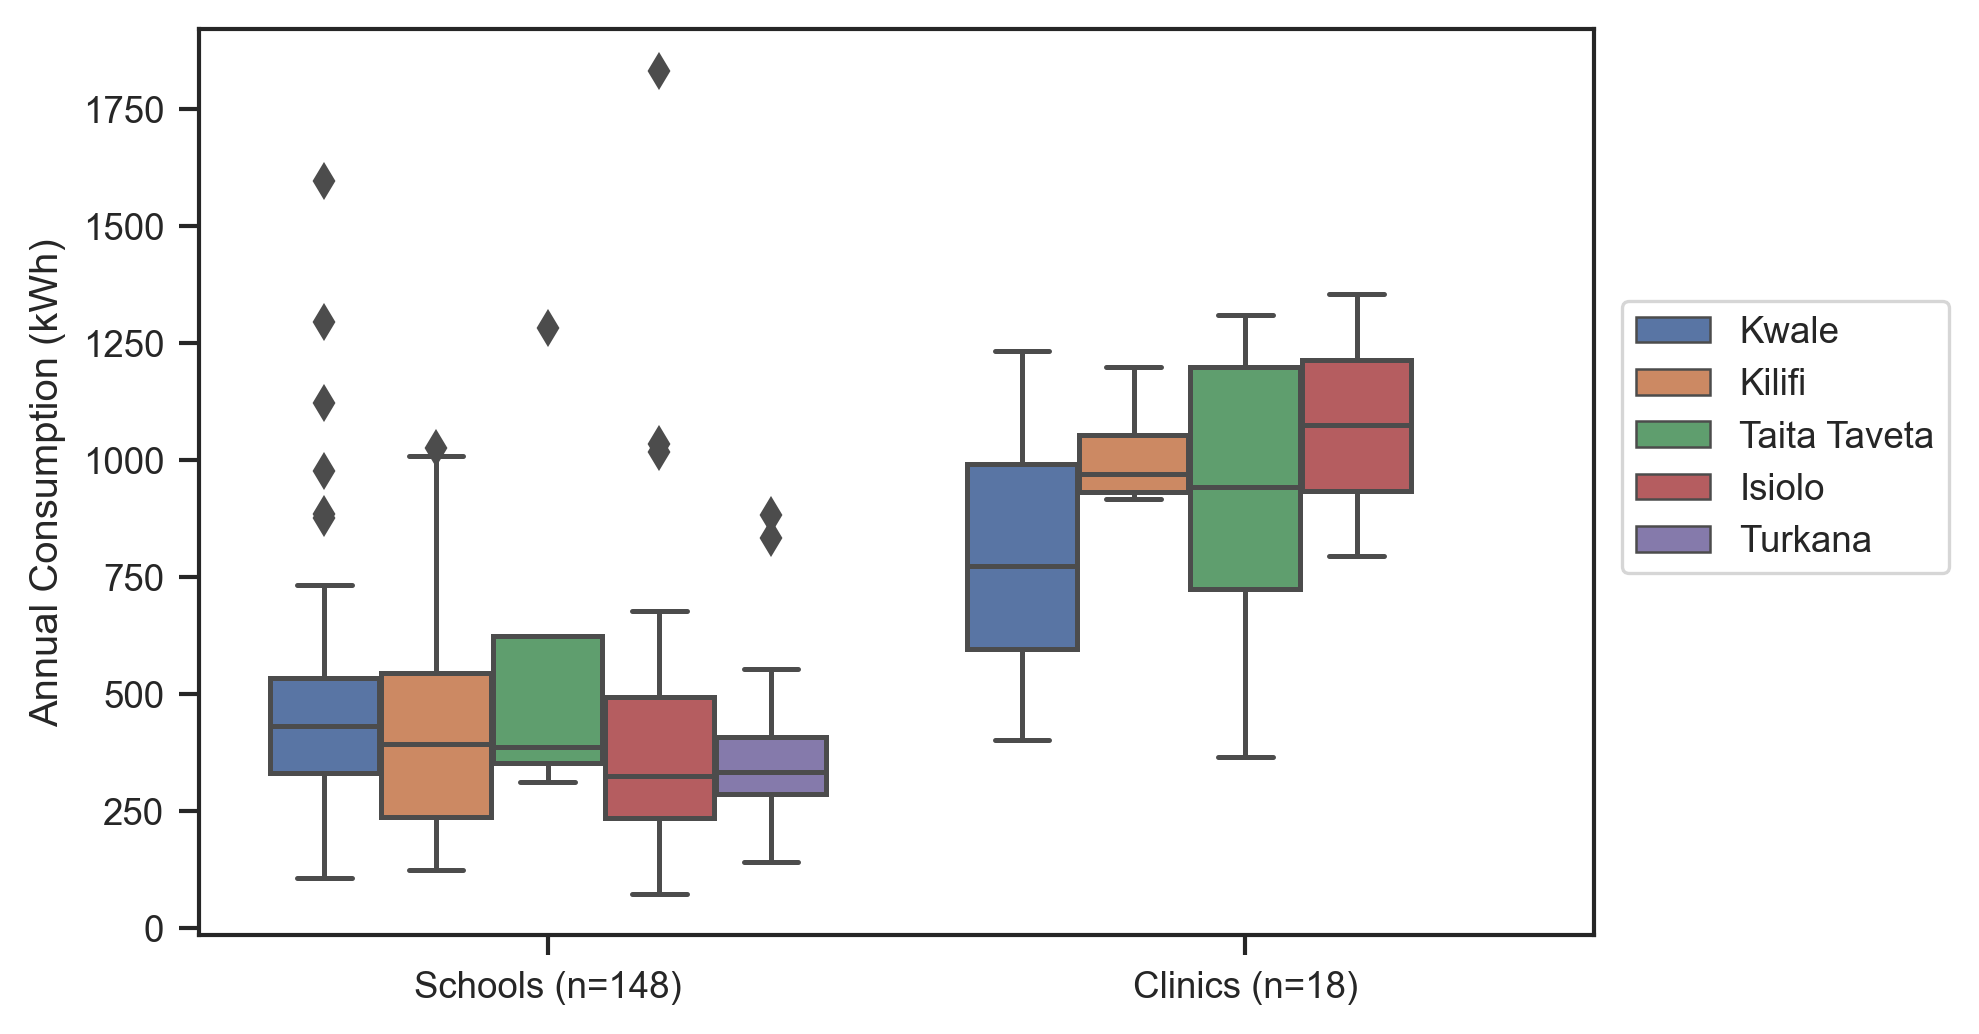

In [22]:
g = sns.boxplot(x="Institution", y="Annual Consumption Filled (kWh)", hue="County", data=new_out,
                hue_order=["Kwale","Kilifi","Taita Taveta","Isiolo", "Turkana"])
g.set(xlabel= None, ylabel="Annual Consumption (kWh)")
g.set_xticklabels(["Schools (n=148)","Clinics (n=18)"])
plt.legend(bbox_to_anchor=(1.02, 0.55), loc="center left", borderaxespad=0)
#plt.ylim(0, 1400)  # uncomment
plt.savefig("Fig_4.3.pdf", dpi=300, bbox_inches="tight")

In [ ]:
# Plots were saved in path of where csv of data is, so I moved them manually to folder:
# "PhD thesis images submission"

#plt.savefig('name.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')
# For more info on how to save figures:
# https://www.marsja.se/how-to-save-a-seaborn-plot-as-a-file-e-g-png-pdf-eps-tiff/

# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)